<a href="https://colab.research.google.com/github/AlexaDestroyer/Analise_de_dados/blob/main/Recrutamento_Preditivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recrutamento preditivo**


A empresa de tecnologia PeopleTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

**Problema de negócio:**

O objetivo  é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.



In [2]:
#bibliotecas
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
! pip install plotly_express
import plotly_express as px

In [3]:
df = pd.read_excel('/content/Recrutamento.xlsx')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


**Inferência sobre a base de dados:**


**Inferencia** refere-se ao processo tirar conclusões ou fazer previsões sobre uma população com base em informações limitadas ou amostras de dados disponíveis.


Variáveis Independentes : gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

Variável Target: No nosso case a target é a coluna status.



In [4]:
set(df.status)

{'No', 'Yes'}

In [5]:
df.shape

(215, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Inferencia dos dados**

Métricas de pontuação sobre ensino: ssc_p hsc_p degree_p estet_p mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.

<Axes: >

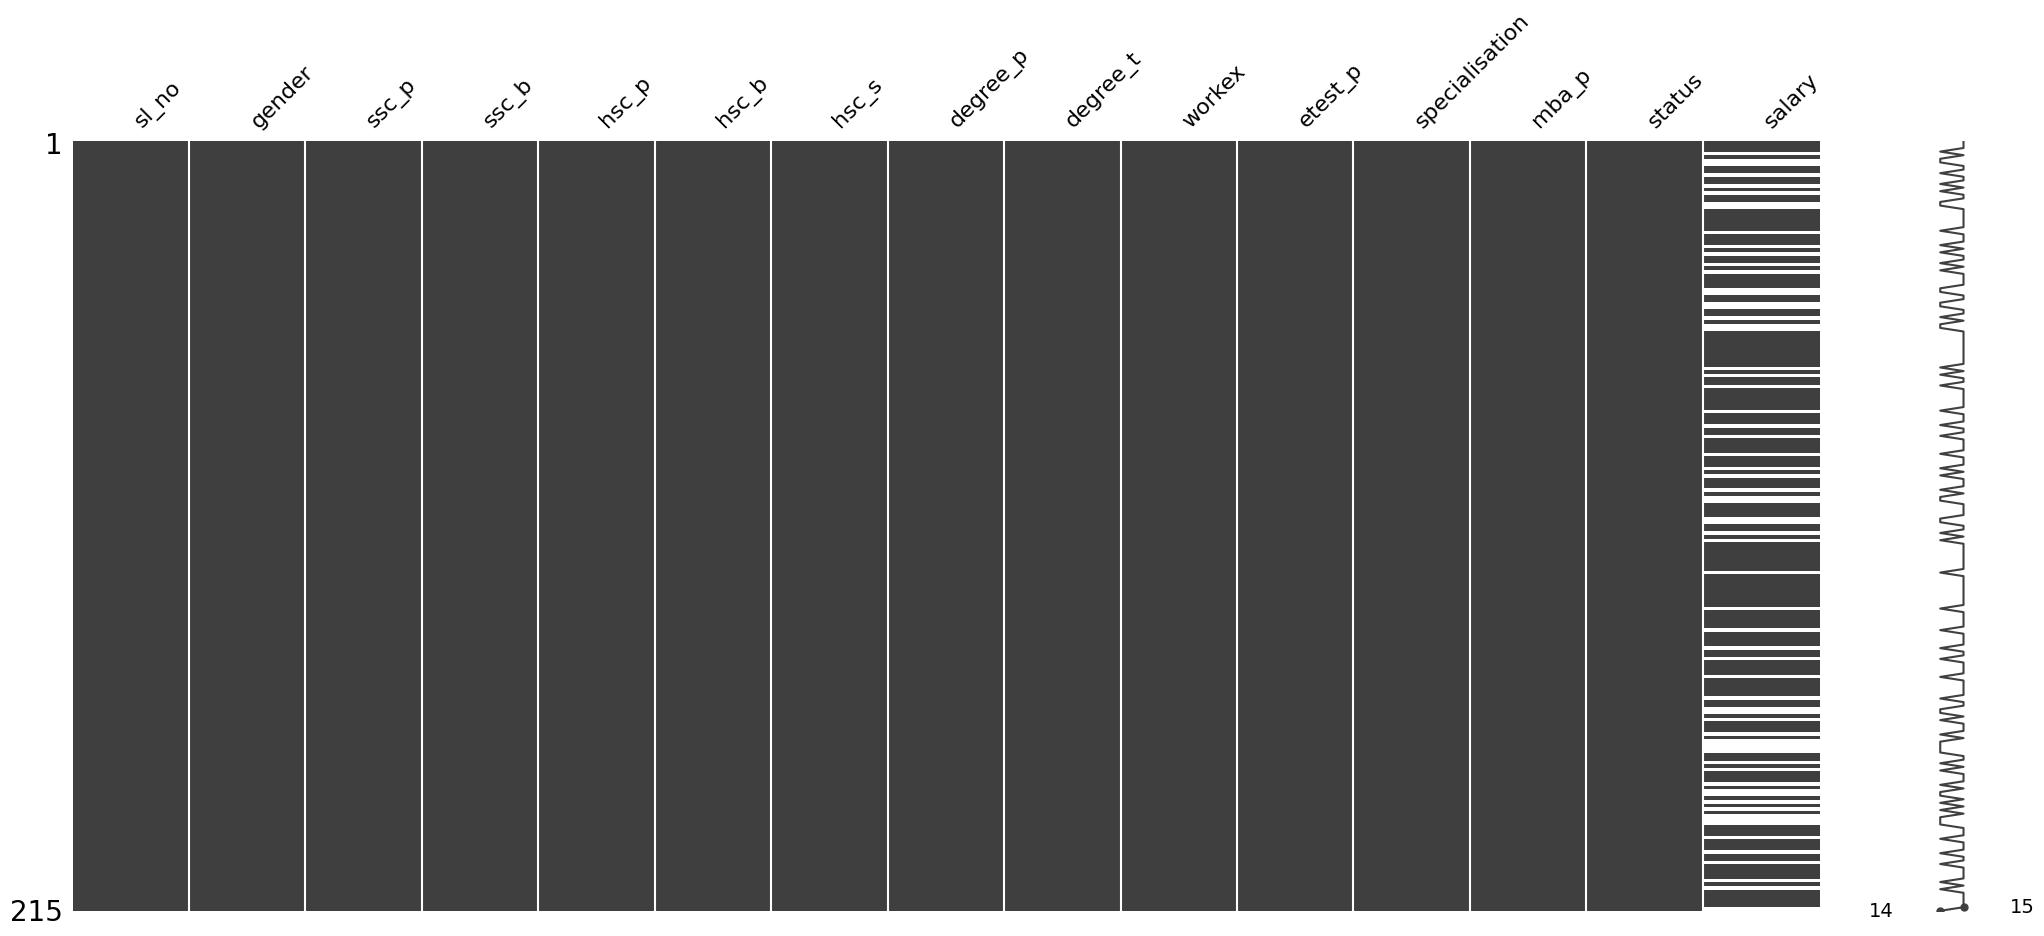

In [8]:
#Observando os valores nulos da base de dados
msno.matrix(df)

In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<ipython-input-10-8ac09e3735a8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'status', y='salary', data=df, palette='rainbow')


<Axes: xlabel='status', ylabel='salary'>

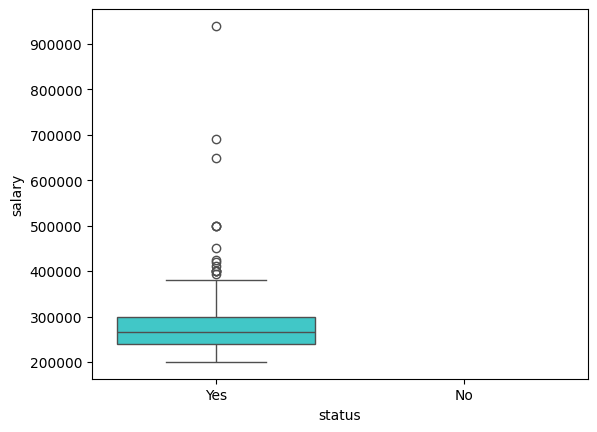

In [10]:
sns.boxplot(x= 'status', y='salary', data=df, palette='rainbow')

**Inferência dos dados:**


A variável Target salário, os valores nulos estão atribuídos a variável do tipo status quando o status é "não", ou seja, para os não contratados temos algumas pessoas da base sem salário atribuído.

Vemos aqui a necessidade de tratar esses valores nulos contido na variavel salario.

In [11]:
#Tratando od valores nulos. Nesse caso vamos atribuir o valor zero para tratar os dados vazios.
df['salary'].fillna(value=0, inplace=True)

In [12]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [13]:
df.duplicated().sum() #verificação de linhas duplicadas

0

**Analisando as variaveis numéricas**
aqui vamos analisar e compreender a distribuição dos dados para cada métrica referente a qualificação de ensino dos candidatos. Também verificar se temos outliers ou valores extremos na base.


<Axes: xlabel='hsc_p'>

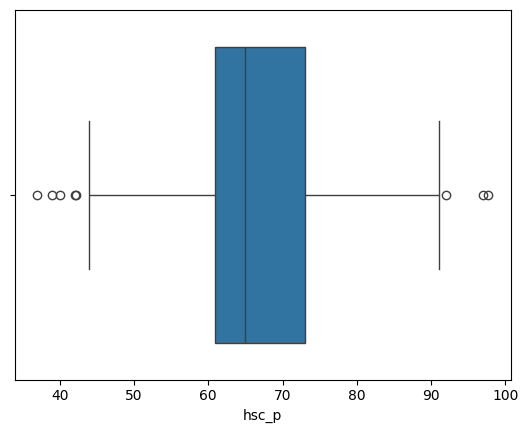

In [14]:
sns.boxplot(x=df['hsc_p'])

<Axes: xlabel='hsc_p', ylabel='Count'>

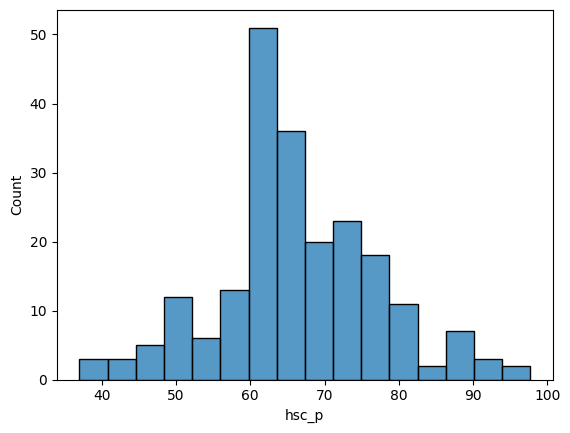

In [15]:
sns.histplot(data=df, x = 'hsc_p')

<Axes: xlabel='degree_p'>

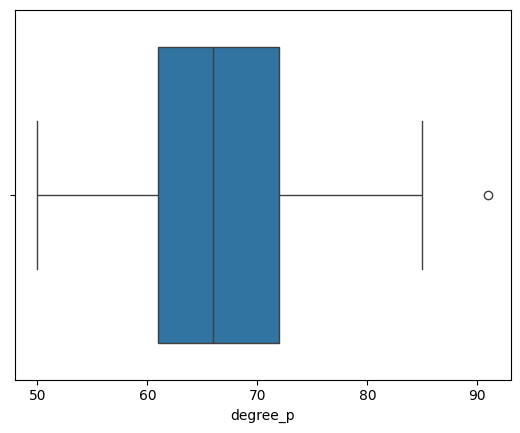

In [16]:
sns.boxplot(x=df['degree_p'])

<Axes: xlabel='degree_p', ylabel='Count'>

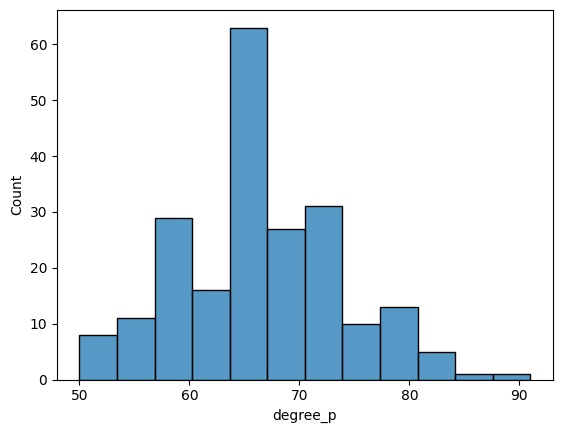

In [17]:
sns.histplot(data=df, x = 'degree_p')

<Axes: xlabel='etest_p'>

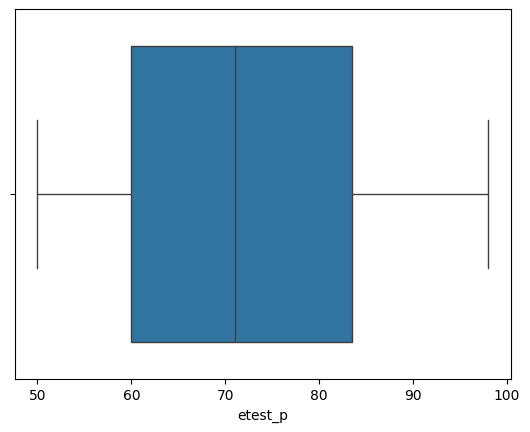

In [18]:
sns.boxplot(x=df['etest_p'])

<Axes: xlabel='mba_p'>

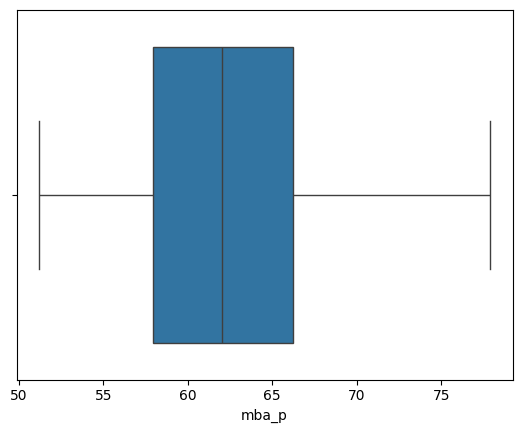

In [19]:
sns.boxplot(x=df['mba_p'])

<Axes: xlabel='salary'>

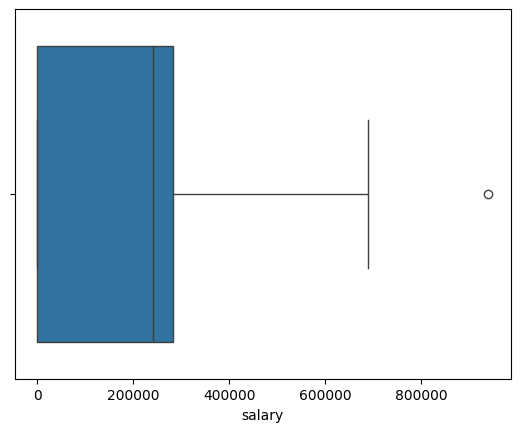

In [20]:
sns.boxplot(x=df['salary'])

<Axes: xlabel='salary', ylabel='Count'>

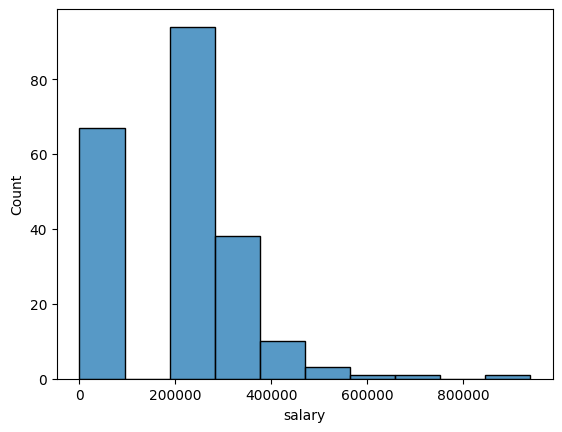

In [21]:
sns.histplot(data=df, x = 'salary')

Influencia do score academico em relação a contratação

[Text(36.5, 0.5, 'mba_p')]

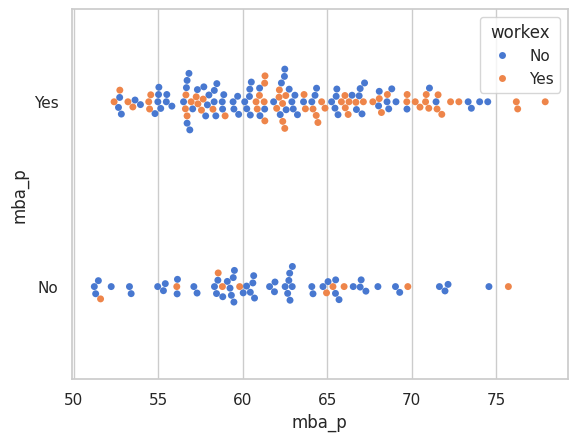

In [22]:
sns.set_theme(style="whitegrid",palette = 'muted')
ax= sns.swarmplot(x="mba_p", data=df, y ='status', hue = 'workex')
ax.set(ylabel = 'mba_p')

**Inferência dos dados**

Podemos observar que as pessoas que possuem MBA estão ativas no mercado de trabalho ou seja a pontuação de MBA pode influênciar na decisão de contratação. Temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com esperiência de trabalho.


Abaixo vamos analisar a correlação entre salario, especilização nos estudos e genero. Será que existe algum viés em relação ao genero ao oferecer a remuneração?

In [23]:
px.violin(df, y='salary', x='specialisation', color='gender', box= True, points='all')

**Inferencia dos dados**

No grafico acima percebemos que os maiores salários se concentram no genero masculino.

**Pré-processamento de dados**

O pré-processamento de dados é uma etapa crucial na análise e modelagem de dados, onde os dados brutos são transformados em um formato mais adequado para análise ou para uso em algoritmos de machine learning.

No começo do projeto aplicamos a tecnica de limpeza dos dados:Tratamento de valores ausentes, Correção de erros,Remoção de  linhas duplicatas . Verficação de possíveis outliers.

aAui vamos usar as tecnicas de Label Encoder e One-hot Encoding. que são tecnicas utilizadas para lidar com variaveis categóricas em um conjunto de dados.

In [24]:
#Pré Processamento dos dados
from sklearn.preprocessing import LabelEncoder

In [25]:
df.head(2) #verificação das variaveis categóricas na base de dados
#temos categoricas: gender, ssc_b,hsc_b,hsc_s,degree_t, workex, specialisation,status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0


**Método LabelEncoder**
Método de codificação que converte cada valor de uma variável categórica em um número inteiro único. È adequado para variáveis ordinais onde os valores têm uma ordem específica.

ex: se tivermos uma variavel de categorica com os rotulos banana, uva, laranja o LabelEncoder converterá para 0,1,2. Ele é muito útil quando a variável categórica tem muitos valores únicos.

In [26]:
#Mapeando as colunas para utilizar método LabelEncoder
colunas = ['gender','workex', 'specialisation', 'status']

label_encoder = LabelEncoder()
for col in colunas:
    df[col] = label_encoder.fit_transform(df[col])


In [47]:
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0


**One Hot Encoding**

È uma ecnica de pre-processamneto que cria variaveis binarias(0 ou 1) para cada categoria em variavel categórica.Cada variável binária indica a presença (1) ou ausência (0) de um valor específico.Adequado para variáveis nominais, evitando a interpretação incorreta de relações ordinais.


**Funçao get-dummies**

A função get_dummies da biblioteca pandas é uma forma simples e eficiente de realizar a codificação de variáveis categóricas em variáveis dummies (ou variáveis indicadoras), semelhante ao One-Hot Encoding. Esta função cria uma coluna binária (0 ou 1) para cada nível da variável categórica, indicando a presença ou ausência desse nível em cada registro.

In [28]:
# OneHotEncoder
dummy_hsc_s = pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(df['degree_t'], prefix='dummy')
dummy_hsc_b = pd.get_dummies(df['hsc_b'], prefix='dummy')
dados_dummy = pd.concat([df,dummy_hsc_s, dummy_degree_t], axis=1)
dados_dummy.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True


In [29]:
dados_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)
dados_dummy.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True


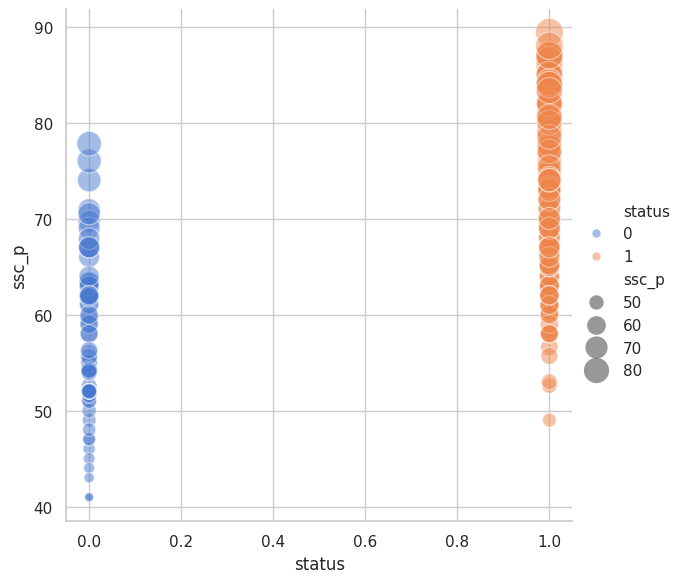

In [52]:
sns.relplot(x="status", y="ssc_p", hue="status", size="ssc_p",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dados_dummy)

**Inferencia dos dados**

O grafico acima , mostra que a maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

In [30]:
# Construindo modelo
# segregar Definindo varaiavies dependentes e target
x = dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = dados_dummy['status']


In [31]:
from sklearn.model_selection import train_test_split  #importando divisão de treino e teste
from sklearn.neighbors import KNeighborsClassifier #importando algoritimo
# separando teste e treino
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify= y, random_state=18)
#stratify: balanceamento da distribuição das classes

In [32]:
x_train.shape

(172, 5)

In [33]:
x_test.shape

(43, 5)

In [55]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


Se analisarmos nossa base de dados, podemos atentar para a escala dos dados. Passamos pela transformaçãode texto para números com LabelEncoder e OneHotEncoding. Mas referindo as escalas numericas, será que elas ficaram na mesma forma ou configuração?

Na base há dimenões de diferentes escalas: 85.80, 67.00, 1. Mas como padronizar ou normalizar essa escala de valores?

Precisamos deixar os dados na mesma 'régua' dai podemos usar essa transformação atraves do pre processing do SKlearn ; StandardScaler, MinMaxScaler

**StandardScaler e MinMaxScaler**

são duas técnicas comuns de normalização de dados usadas no pré-processamento de dados para algoritmos de machine learning. Ambas são parte da biblioteca sklearn


**StandardScaler**  padronização dos dados removendo a média e escalando para a variância unitária. Ou seja, ele transforma os dados para que tenham média 0 e desvio padrão 1.

**MinMaxScaler** normalização os dados escalando cada recurso para um intervalo especificado, geralmente [0, 1]. Ele preserva a relação entre os valores originais enquanto os transforma para um novo intervalo.

In [35]:
#Padronizando as escala de valores -ajustando valores na mesma régua
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() #padronização

scaler.fit(x_train) #treinamento

#Transformação dos dados
x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)


In [36]:
x_train_escalonado

array([[-4.01902638e-01, -6.46269396e-02, -3.51085302e-01,
        -7.31925055e-01,  2.84361639e-01],
       [ 9.74911912e-01, -2.49628747e-01, -3.23827618e-01,
        -7.31925055e-01,  1.67991611e+00],
       [-2.97905977e-02, -1.26713869e+00, -2.14796885e-01,
        -7.31925055e-01, -7.12957685e-01],
       [ 4.35349453e-01, -6.19632363e-01,  3.30356784e-01,
        -7.31925055e-01, -6.99106028e-01],
       [ 1.36562955e+00, -2.49628747e-01,  8.75510453e-01,
         1.36626010e+00,  1.61585219e+00],
       [-1.22054913e+00, -3.42129651e-01, -1.16881581e+00,
        -7.31925055e-01, -6.92180200e-01],
       [ 6.32374125e-02,  8.60382099e-01,  1.01179887e+00,
        -7.31925055e-01,  1.99520238e-01],
       [-3.08874628e-01,  3.23876856e-01, -7.59950553e-01,
        -7.31925055e-01,  1.07914074e-02],
       [ 1.57029118e+00,  6.19879749e-01,  4.27882240e-02,
        -7.31925055e-01,  7.32849310e-03],
       [ 1.71913599e+00,  6.38379929e-01,  9.16396978e-01,
        -7.31925055e-01

In [37]:
#armazenamento da ista de erros. Para encontrar menor erro médio.
error = []
for i in range(1, 10): ##range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i) # Definição do K
    knn.fit(x_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_escalonado) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

Text(0, 0.5, 'Erro Médio')

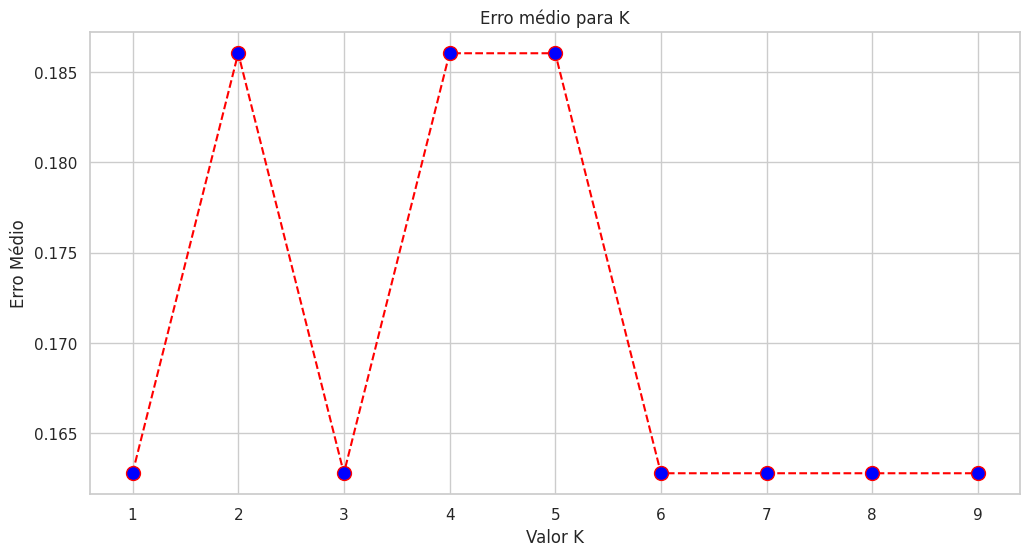

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Erro médio para K')
plt.xlabel('Valor K')
plt.ylabel('Erro Médio')

In [39]:
modelo_classificador = KNeighborsClassifier (n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)
y_predito = modelo_classificador.predict(x_test_escalonado)

In [40]:
y_predito # Predições

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [41]:
#Performance do modelo
from sklearn.metrics import accuracy_score

print('Acurácia: ', accuracy_score(y_test, y_predito))


Acurácia:  0.813953488372093


In [42]:
#Definindo outro modelo para verificar a performance - SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

svm = Pipeline([('Linear_svc', LinearSVC(C=1))])

svm.fit(x_train_escalonado, y_train)


#execução do algoritimo

Pipeline(steps=[('Linear_svc', LinearSVC(C=1))])

In [43]:
y_predito_svm = svm.predict(x_test_escalonado)

In [44]:
# Metricas de precisão, revocação, f1-score e acurácia.
print('Acurácia: ', accuracy_score(y_test, y_predito_svm))

Acurácia:  0.8837209302325582
